# Jade's Notebook Metric: Smart Trash containers 

# Intro 
This notebook measured the data set of smart trash cans. These are trash cans that have sensor in them that can measure the amount of trash 
in a given can. The city of pittsburgh sent these out to popular neiborhoods to collect data on how much public waste is thrown away. 

# Metric
Number of trash cans in each neighborhood 

In [2]:
import pandas as pd

trash = pd.read_csv("smartTrash.csv")
trash.head()


,container_id,address,city,neighborhood
0,1,122 E North Ave,Pittsburgh,Central Northside
1,2,2507 Brighton Rd,Pittsburgh,Marshall-Shadeland
2,3,1300 Federal St,Pittsburgh,Central Northside
3,4,110 Federal St,Pittsburgh,Allegheny Center
4,5,490 E North Ave,Pittsburgh,Central Northside


In [5]:
import pandas as pd

trash = pd.read_csv("smartTrash.csv", sep="\t")
trash.sample(10)

,"container_id,address,city,neighborhood"
191,"220,1100 Brownsville Rd,Pittsburgh,Carrick"
40,"41,623 E Ohio St,Pittsburgh,East Allegheny"
913,"1044,2032 Forbes Ave,Pittsburgh,Bluff"
212,"242,5173 Penn Avenue,Pittsburgh,Bloomfield"
754,"865,1 Poplar Street,Pittsburgh,Westwood"
131,"149,221 South Highland Avenue,Pittsburgh,Shady..."
92,"98,1310 Benton Ave,Pittsburgh,Brighton Heights"
999,"1137,6378 Centre Ave,Pittsburgh,East Liberty"
421,"476,1901 Centre Ave,Pittsburgh,Crawford-Roberts"
227,"258,502 E Ohio St,Pittsburgh,East Allegheny"


In [12]:
# creates dictionary summing up all the trash cans in a neighborhood 
import pandas as pd

nhoodTrash = dict()
for index, row in trash.iterrows():
    neighborhood = row['neighborhood']
    if(neighborhood not in nhoodTrash):
        nhoodTrash[neighborhood] = 1
    else:
        nhoodTrash[neighborhood] += 1
sortedDict = sorted(nhoodTrash.items(), key=lambda x:x[1])
print(sortedDict)
print(len(nhoodTrash))

[('Northview Heights', 1), ('Mt. Oliver', 1), ('South Shore', 1), ('Windgap', 1), ('East Carnegie', 1), ('Bedford Dwellings', 1), ('St. Clair', 1), ('Oakwood', 1), (nan, 1), ('Swisshelm Park', 1), ('Banksville', 2), ('Point Breeze North', 2), ('Homewood West', 2), ('East Hills', 2), ('Stanton Heights', 2), ('Fineview', 3), ('Spring Garden', 3), ('Arlington', 3), ('Beltzhoover', 3), ('Duquesne Heights', 3), ('California-Kirkbride', 4), ('Homewood North', 4), ('Spring Hill-City View', 5), ('Chateau', 5), ('Westwood', 5), ('Terrace Village', 5), ('Manchester', 6), ('Lincoln-Lemington-Belmar', 6), ('Allegheny Center', 7), ('Garfield', 7), ('Central Business District', 7), ('South Oakland', 7), ('Knoxville', 7), ('Upper Hill', 7), ('Lincoln Place', 7), ('Morningside', 8), ('Beechview', 8), ('South Side Slopes', 8), ('Crafton Heights', 8), ('West Oakland', 8), ('Allentown', 9), ('West End', 9), ('Regent Square', 9), ('Central Northside', 10), ('Perry South', 12), ('Point Breeze', 12), ('High

The neighborhood with the most trash containers is 'Shadyside' with 76 trash containers.


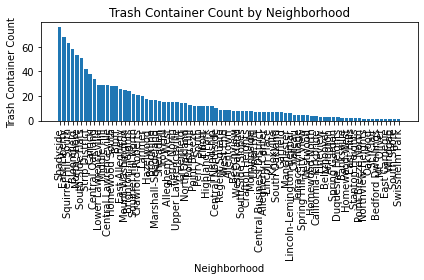

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('smartTrash.csv')

# Group the data by neighborhood and count the number of trash containers in each neighborhood
neighborhood_counts = df['neighborhood'].value_counts()

# Get the neighborhood with the most trash containers
neighborhood_with_most_trash = neighborhood_counts.idxmax()

# Get the count of trash containers in the neighborhood with the most trash
most_trash_count = neighborhood_counts.max()

# Print the result
print(f"The neighborhood with the most trash containers is '{neighborhood_with_most_trash}' with {most_trash_count} trash containers.")

# Create a bar graph to visualize the neighborhood with the most trash containers
plt.bar(neighborhood_counts.index, neighborhood_counts.values)
plt.xlabel('Neighborhood')
plt.ylabel('Trash Container Count')
plt.title('Trash Container Count by Neighborhood')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

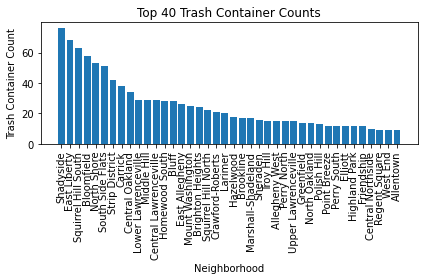

In [8]:
# Get the top 25 neighborhoods with most trash

top40_neighborhoods = neighborhood_counts.head(40)

# Create a bar graph to visualize the top 10 neighborhoods with the most trash containers
plt.bar(top40_neighborhoods.index, top40_neighborhoods.values)
plt.xlabel('Neighborhood')
plt.ylabel('Trash Container Count')
plt.title('Top 40 Trash Container Counts')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

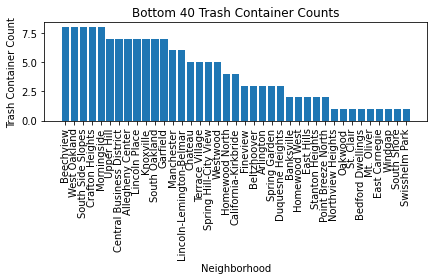

In [9]:
# Get the top 25 neighborhoods with least trash
bottom40_neighborhoods = neighborhood_counts.tail(39)

# Create a bar graph to visualize the top 10 neighborhoods with the most trash containers
plt.bar(bottom40_neighborhoods.index, bottom40_neighborhoods.values)
plt.xlabel('Neighborhood')
plt.ylabel('Trash Container Count')
plt.title('Bottom 40 Trash Container Counts')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

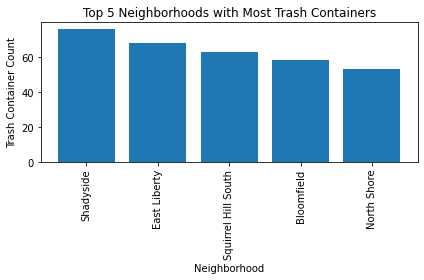

In [14]:
# Get the top 10 neighborhoods with the least trash containers
top5_neighborhoods = neighborhood_counts.head(5)

# Create a bar graph to visualize the top 10 neighborhoods with the most trash containers
plt.bar(top5_neighborhoods.index, top5_neighborhoods.values)
plt.xlabel('Neighborhood')
plt.ylabel('Trash Container Count')
plt.title('Top 5 Neighborhoods with Most Trash Containers')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [11]:
# new dict that splits up nhoods into percentages so they can be given a score from 5-1 
import pandas as pd

trash = pd.read_csv("smartTrash.csv")
trash.head()

nhoodTrash = {}
for index, row in trash.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood not in nhoodTrash:
        nhoodTrash[neighborhood] = 1
    else:
        nhoodTrash[neighborhood] += 1

trash_counts = sorted(list(nhoodTrash.values()))
pct_20 = trash_counts[int(0.8 * len(trash_counts))]
pct_40 = trash_counts[int(0.6 * len(trash_counts))]
pct_60 = trash_counts[int(0.4 * len(trash_counts))]
pct_80 = trash_counts[int(0.2 * len(trash_counts))]

score_dict = {}
for neighborhood, trash_cans in nhoodTrash.items():
    if trash_cans >= pct_20:
        score_dict[neighborhood] = 5
    elif trash_cans >= pct_40:
        score_dict[neighborhood] = 4
    elif trash_cans >= pct_60:
        score_dict[neighborhood] = 3
    elif trash_cans >= pct_80:
        score_dict[neighborhood] = 2
    else:
        score_dict[neighborhood] = 1
        
    
sortedScores = dict(sorted(score_dict.items(), key=lambda x:x[1]))
print(sortedScores)


{'Northview Heights': 1, 'Mt. Oliver': 1, 'South Shore': 1, 'Windgap': 1, 'East Carnegie': 1, 'Bedford Dwellings': 1, 'Banksville': 1, 'St. Clair': 1, 'Oakwood': 1, 'Point Breeze North': 1, 'Homewood West': 1, 'East Hills': 1, 'Stanton Heights': 1, nan: 1, 'Swisshelm Park': 1, 'California-Kirkbride': 2, 'Manchester': 2, 'Fineview': 2, 'Spring Hill-City View': 2, 'Spring Garden': 2, 'Chateau': 2, 'Arlington': 2, 'Beltzhoover': 2, 'Westwood': 2, 'Duquesne Heights': 2, 'Terrace Village': 2, 'Homewood North': 2, 'Lincoln-Lemington-Belmar': 2, 'Central Northside': 3, 'Allegheny Center': 3, 'Garfield': 3, 'Morningside': 3, 'Beechview': 3, 'Central Business District': 3, 'South Oakland': 3, 'Allentown': 3, 'South Side Slopes': 3, 'West End': 3, 'Knoxville': 3, 'Crafton Heights': 3, 'Upper Hill': 3, 'West Oakland': 3, 'Lincoln Place': 3, 'Regent Square': 3, 'Marshall-Shadeland': 4, 'Perry North': 4, 'Perry South': 4, 'Allegheny West': 4, 'Troy Hill': 4, 'Brighton Heights': 4, 'Greenfield': 4, 

# Conclusion
From the data above, we can conclude that Shadyside, east liberty and squirrle hill south have the most trash containers. 
We can assume these neigborhoods are the most consious about thier waste. The smart containers have sensors that measure how full the cans are
this can provide data on the amount waste of a neighborhood can produce and according to the department of public waste, it allows workers
to not waste time by emptying non-full trash cans. This makes labor more efficent for the city of pittsburgh. Although Shadyside is the "best" 
neigborhood, my personal favorite is East Liberty because there are many shopping places that I fequently go to such as Target and Trader Joes. 